In [536]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

sns.set(rc={'figure.figsize':(10,7)})

from scipy.stats import ttest_ind

In [537]:
df = pd.read_csv("World_Cup_2018_Match_Stats.csv",encoding = 'utf-8')

In [538]:
df.head()

,match_id,match_date,team.name,score,Shots,ShotsOnTarget,AvgShotDistance,XG,Possession,PctPossession,...,Opp_dirn.of.resultant.pass.z2,Opp_length.of.resultant.pass.z3,Opp_dirn.of.resultant.pass.z3,Opp_z1.passes,Opp_z2.passes,Opp_z3.passes,Opp_z1.pass.pct,Opp_z2.pass.pct,Opp_z3.pass.pct,Opp_Result
0,7525,2018-06-14,Russia,5,14,7,17.957558,1.159168,388,0.404167,...,16.873015,1.263202,179.522552,174,303,95,0.304196,0.529720,0.166084,L
1,7529,2018-06-16,Croatia,2,11,2,18.852271,1.336756,503,0.542026,...,0.351773,5.153295,58.302854,131,229,65,0.308235,0.538824,0.152941,L
2,7530,2018-06-16,France,2,12,4,21.700749,1.265828,549,0.552870,...,12.862752,2.603630,18.666917,169,215,60,0.380631,0.484234,0.135135,L
3,7531,2018-06-16,Argentina,1,28,7,21.632877,1.772002,796,0.780392,...,10.929487,6.035808,47.238008,84,89,51,0.375000,0.397321,0.227679,D
4,7532,2018-06-16,Peru,0,17,6,19.412266,1.969108,435,0.519713,...,2.945097,3.265795,26.433185,92,191,119,0.228856,0.475124,0.296020,W


# Possession and Attack

# Goals scored 

### To score more goals, you need to get more shots on target ... And to get more shots on target, take more shots! 

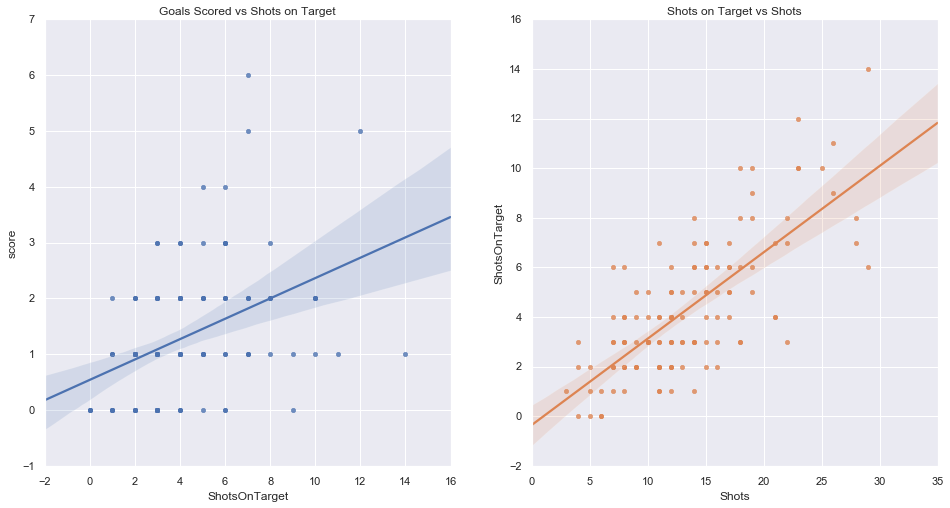

In [539]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=2)
ax0 = sns.regplot(x='ShotsOnTarget',y='score',data=df,ax=axes[0]);
ax1 = sns.regplot(x='Shots',y='ShotsOnTarget',data=df,ax=axes[1]);
ax0.set_title('Goals Scored vs Shots on Target');
ax1.set_title('Shots on Target vs Shots');

### The closer you are to the goal, the more shots you get on target

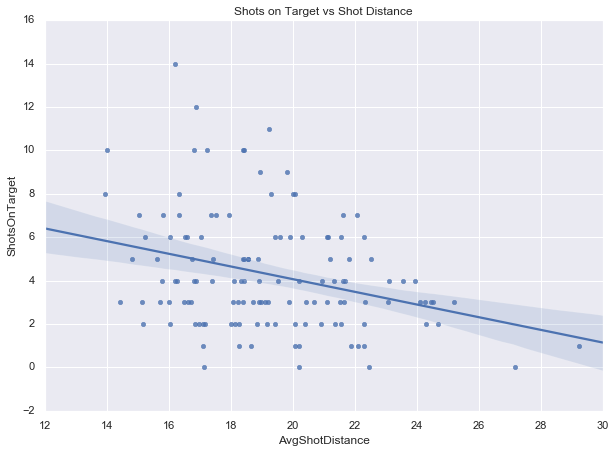

In [540]:
ax = sns.regplot(x='AvgShotDistance',y='ShotsOnTarget',data=df);
ax.set_title('Shots on Target vs Shot Distance');

### The better the quality of the chances, the more shots you get on target


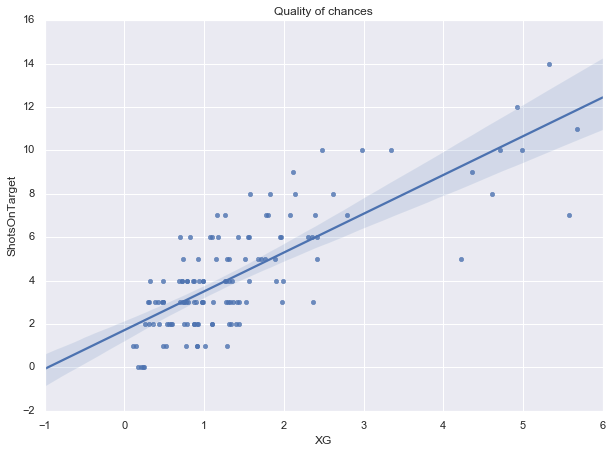

In [541]:
ax = sns.regplot(x='XG',y='ShotsOnTarget',data=df);
ax.set_title('Quality of chances');

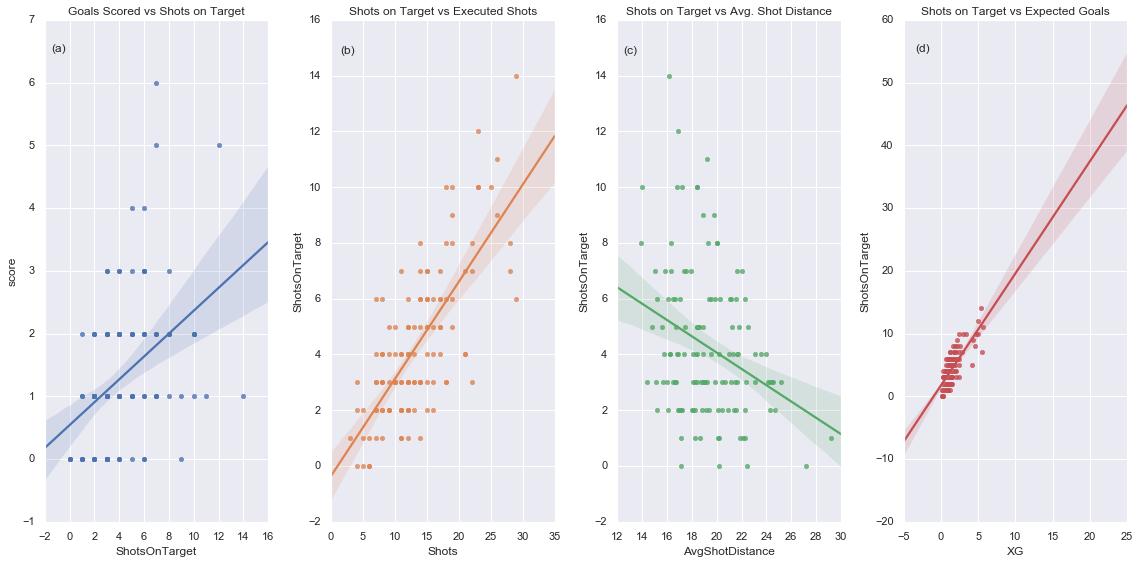

In [569]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=4)
ax0 = sns.regplot(x='ShotsOnTarget',y='score',data=df,ax=axes[0]);
ax1 = sns.regplot(x='Shots',y='ShotsOnTarget',data=df,ax=axes[1]);
ax2 = sns.regplot(x='AvgShotDistance',y='ShotsOnTarget',data=df,ax=axes[2]);
ax3 = sns.regplot(x='XG',y='ShotsOnTarget',data=df,ax=axes[3]);
ax0.set_title('Goals Scored vs Shots on Target');
ax1.set_title('Shots on Target vs Executed Shots');
ax2.set_title('Shots on Target vs Avg. Shot Distance');
ax3.set_title('Shots on Target vs Expected Goals');
ax0.text(-1.5,6.5,'(a)')
ax1.text(1.5,14.8,'(b)')
ax2.text(12.5,14.8,'(c)')
ax3.text(-3.5,55,'(d)')
plt.tight_layout()
fig.savefig('./Report/fig1.eps')

### Though we have strong evidence that greater possession leads to more shots, it does not necessaily lead to more goals! 

### That is, dominating the ball might lead to more shots and slightly better quality of chances, but ultimately when you look at actual goals scored, dominating possession does not necessarily lead to more goals. It's marginal at best.

### So much for possession!

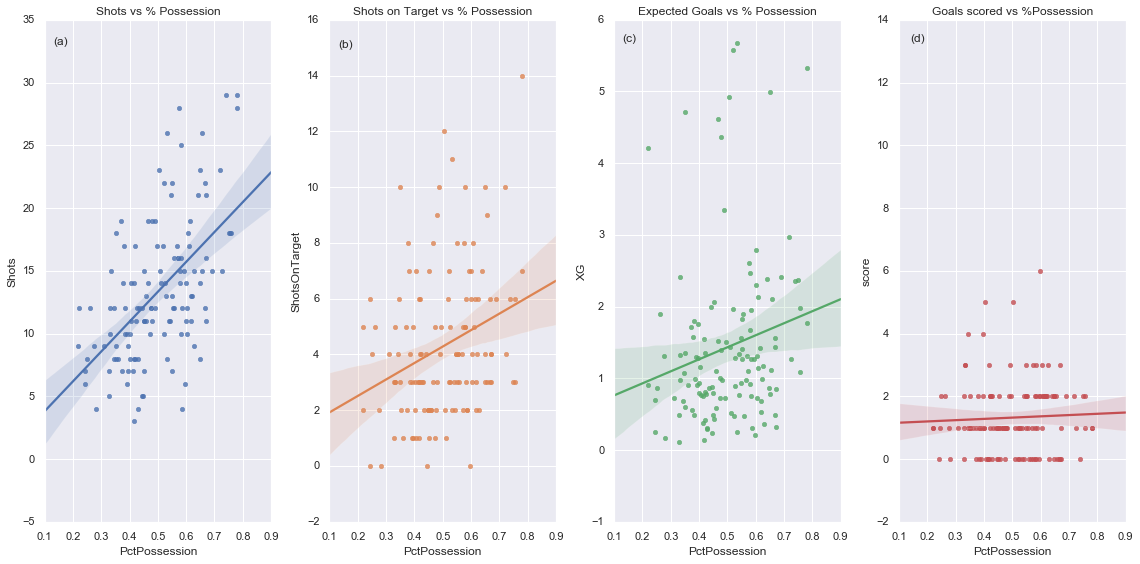

In [577]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=4)
ax0 = sns.regplot(x='PctPossession',y='Shots',data=df,ax=axes[0]);
ax1 = sns.regplot(x='PctPossession',y='ShotsOnTarget',data=df,ax=axes[1]);
ax2 = sns.regplot(x='PctPossession',y='XG',data=df,ax=axes[2]);
ax3 = sns.regplot(x='PctPossession',y='score',data=df,ax=axes[3]);
ax0.set_title('Shots vs % Possession');
ax1.set_title('Shots on Target vs % Possession');
ax2.set_title('Expected Goals vs % Possession');
ax3.set_title('Goals scored vs %Possession');

ax0.text(0.13,33,'(a)')
ax1.text(0.13,15,'(b)')
ax2.text(0.13,5.7,'(c)')
ax3.text(0.14,13.3,'(d)')

plt.tight_layout()
fig.savefig('./Report/fig2.eps')

In [249]:
# Shots vs PctPossession
X = df["PctPossession"] 
y = df["Shots"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.422696,1.662554,0.855729,3.937720e-01,-1.867450,4.712843
PctPossession,23.810858,3.217614,7.400160,1.691441e-11,17.443294,30.178421


In [252]:
# Shots on Target vs PctPossession
X = df["PctPossession"] 
y = df["ShotsOnTarget"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.330848,0.897389,1.483023,0.140565,-0.445058,3.106754
PctPossession,5.900804,1.736755,3.397602,0.000910,2.463816,9.337792


In [253]:
# Expected Goals vs PctPossession
X = df["PctPossession"] 
y = df["XG"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.595467,0.404781,1.471084,0.143762,-0.205583,1.396516
PctPossession,1.676581,0.783390,2.140161,0.034269,0.126275,3.226888


In [508]:
# Goals Scored vs PctPossession
X = df["PctPossession"] 
y = df["score"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.117434,0.406480,2.749049,0.006856,0.313022,1.921846
PctPossession,0.405758,0.786679,0.515786,0.606908,-1.151056,1.962571


### This seems to support the idea that having greater possession does not translate into the creation of better quality chances

### Note the outliers along the top of the graph. Is this due to rubbish defending by the opposition?
### ANS: No! All but one are due to penalty shoot outs in the knockout phase

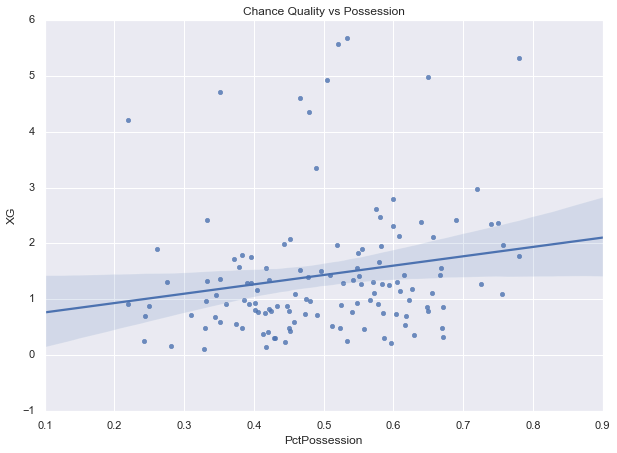

In [115]:
ax = sns.regplot(x='PctPossession',y='XG',data=df);
ax.set_title('Chance Quality vs Possession');

### We can see the penalty shoot outs in the anomalous cluster on the top right

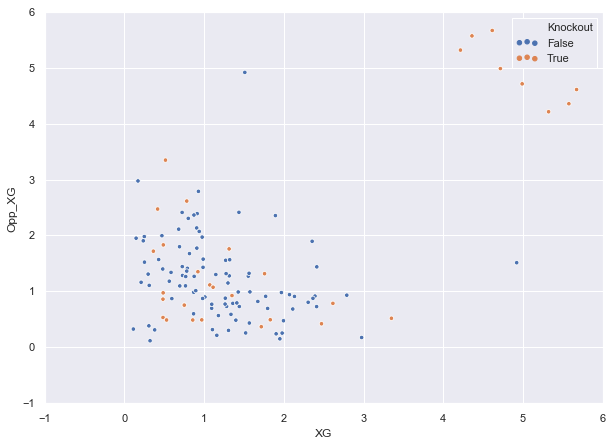

In [137]:
df1 = df
df1['Knockout'] = df['match_date']>'2018-06-29'
ax = sns.scatterplot(x='XG',y='Opp_XG',data=df1, hue='Knockout');
del(df1)

### To increase your share of possession, you must implement a short passing game

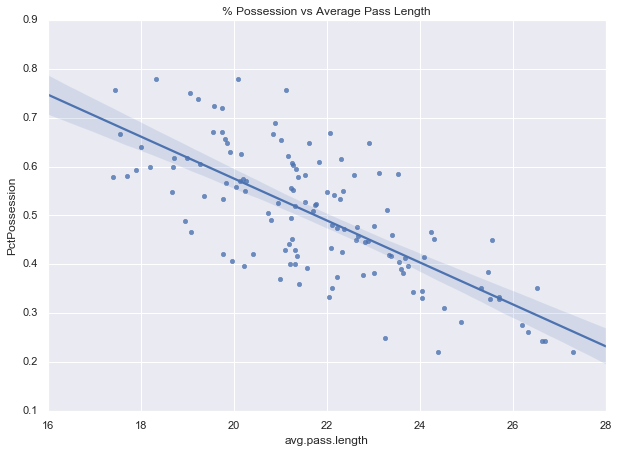

In [602]:
fig, axes = plt.subplots(nrows=1, ncols=1)
ax0 = sns.regplot(x='avg.pass.length',y='PctPossession',data=df);
ax0.set_title('% Possession vs Average Pass Length');
fig.savefig('./Report/fig4.eps')

# Space 

The play becomes more condensed as you move up the pitch. i.e. Space is at a premium. We can see how the mean pass length decreses as we move up the pitch.

Similarly we see that, as evidenced through the mean direction, the play becomes less direct the farther we move up the pitch

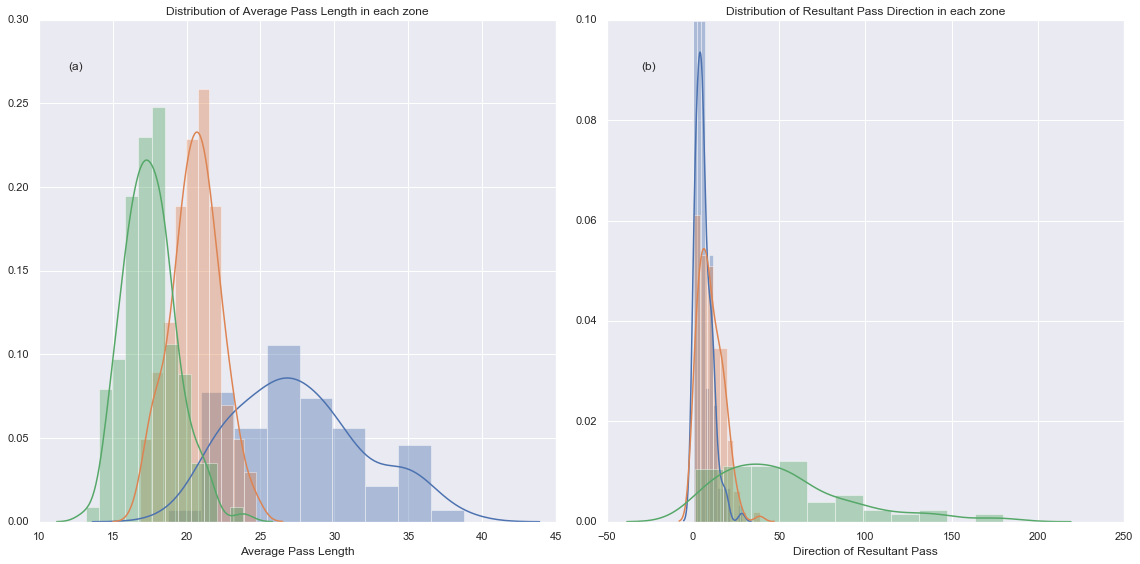

In [582]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=2)
sns.distplot(df['avg.pass.length.z1'], ax=axes[0]);
sns.distplot(df['avg.pass.length.z2'], ax=axes[0]);
ax1=sns.distplot(df['avg.pass.length.z3'], ax=axes[0]);
ax1.set_title('Distribution of Average Pass Length in each zone')
ax1.set_xlabel('Average Pass Length')

sns.distplot(df['dirn.of.resultant.pass.z1'], ax=axes[1]);
sns.distplot(df['dirn.of.resultant.pass.z2'], ax=axes[1]);
ax2 = sns.distplot(df['dirn.of.resultant.pass.z3'], ax=axes[1]);
ax2.set_title('Distribution of Resultant Pass Direction in each zone')
ax2.set_xlabel('Direction of Resultant Pass')

ax1.text(12,0.27,'(a)')
ax2.text(-30,0.09,'(b)')

plt.tight_layout()


fig.savefig('./Report/fig5.eps')

# Possession and Defence

### How does your team's possession affect the number of chances and goals conceded? 

### The chart below is an inverse image of an earlier one. Tht is, it can be disregarded as it contains no new information

### At this point we conclude that having increased possession may marginally increase your chances of scoring a goal. BUT it also marginally increases your chances of NOT conceding

## So there's a double positive whammy to dominating the ball!

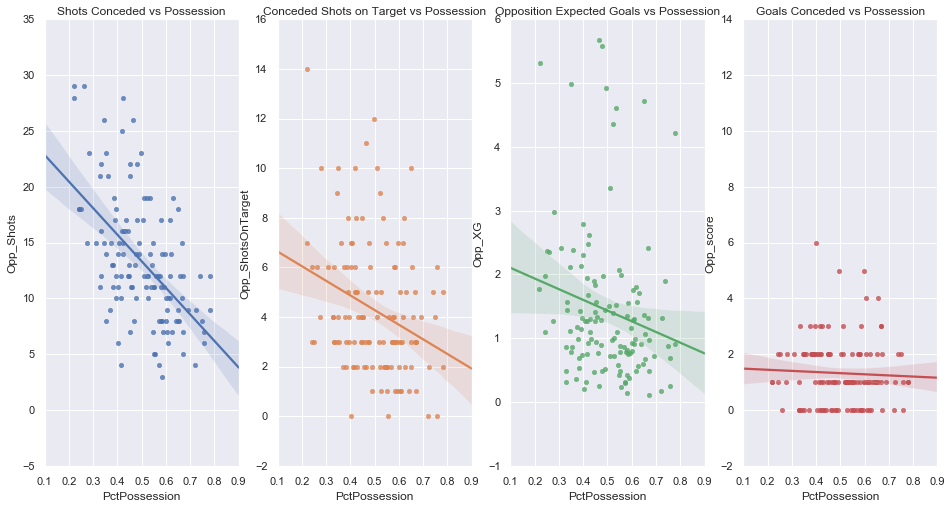

In [153]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=4)
ax0 = sns.regplot(x='PctPossession',y='Opp_Shots',data=df,ax=axes[0]);
ax1 = sns.regplot(x='PctPossession',y='Opp_ShotsOnTarget',data=df,ax=axes[1]);
ax2 = sns.regplot(x='PctPossession',y='Opp_XG',data=df,ax=axes[2]);
ax3 = sns.regplot(x='PctPossession',y='Opp_score',data=df,ax=axes[3]);
ax0.set_title('Shots Conceded vs Possession');
ax1.set_title('Conceded Shots on Target vs Possession');
ax2.set_title('Opposition Expected Goals vs Possession');
ax3.set_title('Goals Conceded vs Possession');

# T-Test

### Our null hypothesis is that the mean goals scored in two groups are equal 

### So we form two groups as follows: For each match, we put the team with lower possession into group 1 and the more dominant team in group 2

### Then we measure the goals scored per match (Sample mean of goals scored) in each group. If our null hypothesis is incorrect we expect the goals scored by the more dominant group 2 to be significantly greater than group 1

### Let us begin by measuring the mean goals per match for these two groups

In [190]:
group1_goals_scored = df[ df['PctPossession']<0.5 ]['score'].values
group2_goals_scored = df[ df['PctPossession']>0.5 ]['score'].values
group1_mean_goals_scored = np.mean(group1_goals_scored)
group2_mean_goals_scored = np.mean(group2_goals_scored)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


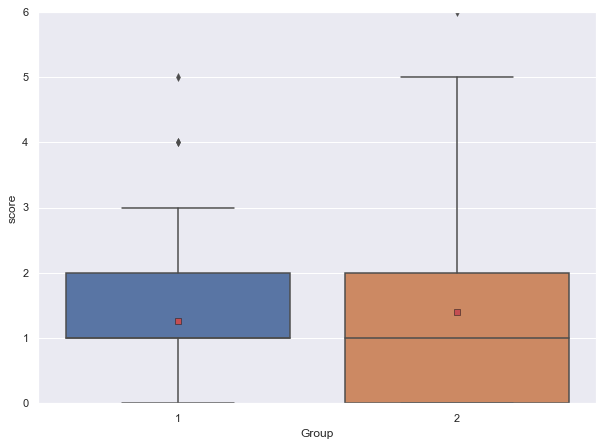

In [214]:

#fig = plt.figure(1, figsize=(9, 6))
#axes = fig.add_subplot(111)
#bp = axes.boxplot(by=df['Group'],df['score'],showmeans=True)
df1 = df[['score','PctPossession']]
df1['Group'] = 1
df1.loc[df1['PctPossession'] > 0.5, 'Group'] = 2

sns.boxplot(y=df1['score'].astype('float'), x=df1['Group'],showmeans=True );

In [183]:
ttest_results = ttest_ind(group1_goals_scored,group2_goals_scored)
ttest_results

Ttest_indResult(statistic=-0.6864019462367644, pvalue=0.4937208914951934)

In [516]:
np.mean(group2_goals_scored)

1.390625

In [587]:
list1 = [ 4,  3,  1,  3,  1,  3,  2,  1,  0,  0, 13,  0,  2,  2,  1,  3,  0,
        2,  1,  0,  3,  2,  5,  3,  0,  1,  0,  0,  1,  0,  0,  3,  0,  2,
        0,  2,  3,  1,  3,  2,  1,  1,  2,  2,  0,  1,  0,  1,  1,  1,  1,
        2,  0,  0,  0,  1,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,  0,  2,
        1,  1,  0,  5,  1,  0,  1,  0,  1,  2,  0,  4,  4,  1,  2,  3,  2,
        1,  2,  1,  0,  1,  0,  1,  2,  0,  1,  0,  3,  2,  2,  2,  2,  0,
        2,  0]


list2 = [0.66150671, 0.58603491, 0.61129944, 0.7431629 , 0.62107905,
       0.61419355, 0.58805668, 0.73113208, 0.29405941, 0.3108365 ,
       0.72895277, 0.32366589, 0.36290323, 0.44956413, 0.35287356,
       0.55520505, 0.47705443, 0.50546177, 0.73539928, 0.43640607,
       0.60207612, 0.69134515, 0.71926007, 0.7062212 , 0.29361179,
       0.58323208, 0.35449735, 0.40419162, 0.27497425, 0.48148148,
       0.47344322, 0.50825921, 0.35178777, 0.49006623, 0.38557692,
       0.43876338, 0.66618705, 0.46190858, 0.67355822, 0.50972364,
       0.46231156, 0.40764331, 0.53533569, 0.38486141, 0.49336057,
       0.60735469, 0.37218045, 0.62721239, 0.57273769, 0.56244541,
       0.61672096, 0.50536353, 0.33849329, 0.41396509, 0.38870056,
       0.2568371 , 0.37892095, 0.38580645, 0.41194332, 0.26886792,
       0.70594059, 0.6891635 , 0.27104723, 0.67633411, 0.63709677,
       0.55043587, 0.64712644, 0.44479495, 0.52294557, 0.49453823,
       0.26460072, 0.56359393, 0.39792388, 0.30865485, 0.28073993,
       0.2937788 , 0.70638821, 0.41676792, 0.64550265, 0.59580838,
       0.72502575, 0.51851852, 0.52655678, 0.49174079, 0.64821223,
       0.50993377, 0.61442308, 0.56123662, 0.33381295, 0.53809142,
       0.32644178, 0.49027636, 0.53768844, 0.59235669, 0.46466431,
       0.61513859, 0.50663943, 0.39264531, 0.62781955, 0.37278761,
       0.42726231, 0.43755459, 0.38327904, 0.49463647]

list3 = [2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1]

df_2019 = pd.DataFrame(list(zip(list1, list2, list3)),columns =['score', 'PctPossession','Group'])
df_2019.head()

,score,PctPossession,Group
0,4,0.661507,2
1,3,0.586035,2
2,1,0.611299,2
3,3,0.743163,2
4,1,0.621079,2


In [ ]:
pd.Data

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


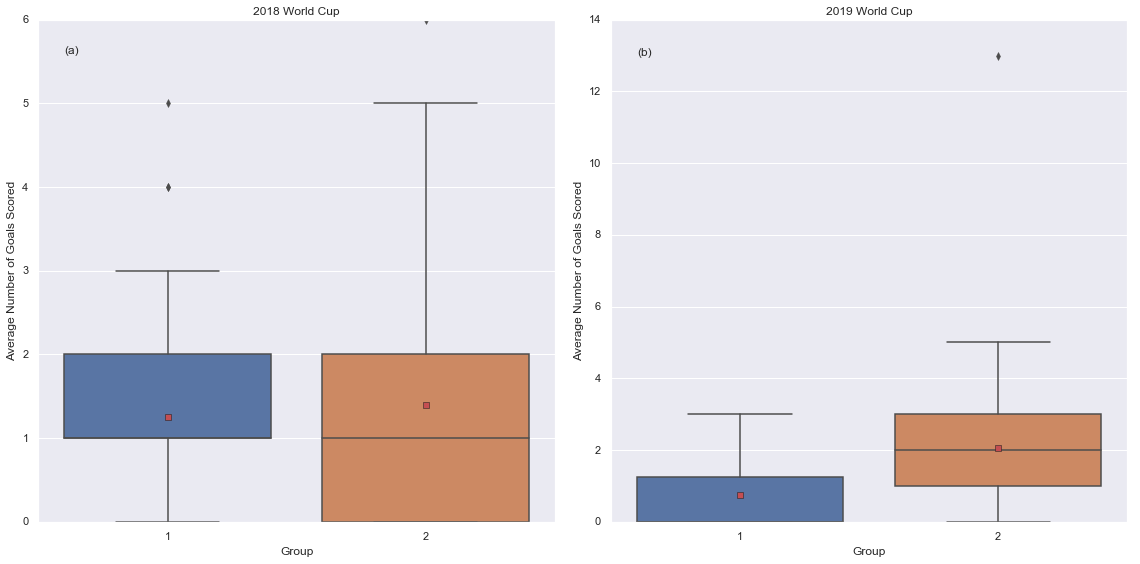

In [600]:

fig, axes = plt.subplots(figsize=(16,8),nrows=1, ncols=2)

df1 = df[['score','PctPossession']]
df1['Group'] = 1
df1.loc[df1['PctPossession'] > 0.5, 'Group'] = 2

ax0 = sns.boxplot(y=df1['score'].astype('float'), x=df1['Group'],showmeans=True,ax=axes[0] );
ax1 = sns.boxplot(y=df_2019['score'].astype('float'), x=df_2019['Group'],showmeans=True,ax=axes[1] );
ax0.set_ylabel('Average Number of Goals Scored');
ax1.set_ylabel('Average Number of Goals Scored');
ax0.text(-0.4,5.6,'(a)');
ax1.text(-0.4,13,'(b)');
ax0.set_title("2018 World Cup");
ax1.set_title("2019 World Cup");
plt.tight_layout()
fig.savefig('./Report/fig3.eps')

## Second Test

### Here we do a simple linear regression and use the p-value to determine significance

In [223]:
# Subtract the possession stats and goals scored
df1 = df[['score','Opp_score','PctPossession','Opp_PctPossession']]
df1 = df1.iloc[0:64]
df1['GoalDiff'] = df1['score'] - df1['Opp_score']
df1['PossDiff'] = df1['PctPossession'] - df1['Opp_PctPossession']

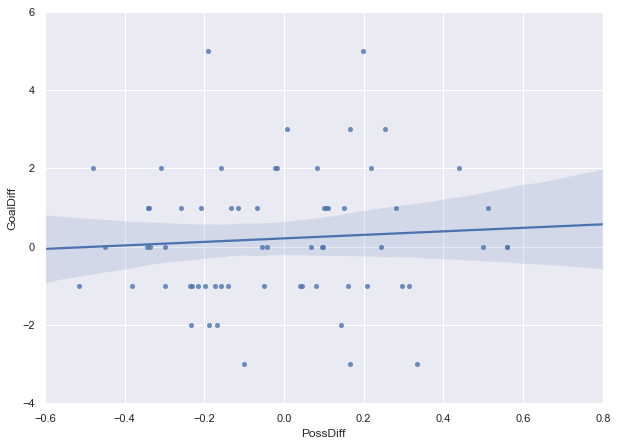

In [230]:
sns.regplot(x='PossDiff', y='GoalDiff', data=df1);

In [245]:
X = df1["PossDiff"] 
y = df1["GoalDiff"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#plt.plot(X['PossDiff'],predictions)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GoalDiff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3028
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.584
Time:                        12:49:22   Log-Likelihood:                -123.81
No. Observations:                  64   AIC:                             251.6
Df Residuals:                      62   BIC:                             255.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2095      0.213      0.984      0.329      -0.216       0.635
PossDiff       0.4497      0.817      0.550      0.584      -1.184       2.083
==============================================================================
Omnibus:                        4.730   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.785
Skew:                           0.532   Prob(JB):                        0.151
Kurtosis:                       3.537   Cond. No.                         3.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

### To understand which are the important variables that determine the match result, let us build a logistic regression model

### That is, we will build a model that takes in stats and predicts if the 'home' team won the match or not

### I first looked at my features and their correlations. To reduce multicollinearity issues I chose the following features

- ShotsOnTarget
- PctPossession
- AvgShotDistance

### Note that we have 26 wins in our 64 matches. Therefore if we use a dumb baseline model where we assume a draw/loss for every match, we would have a prediction accuracy of (64-26)/64 = 59.375%.

### Therefore any useful model will have to beat this score significantly!

In [350]:
# Select dataframe with details of our 64 matches/data points
df1 = df.iloc[0:64]



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


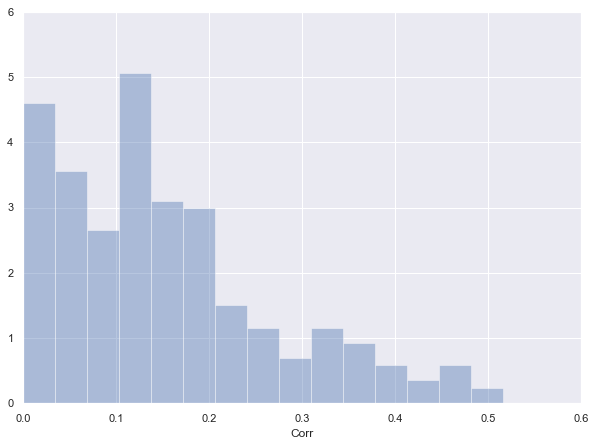

In [362]:
# Select dataframe with details of our 64 matches/data points
df1 = df.iloc[0:64]

def encode_result(x):
    if x == 'W':
        val = 1
    else:
        val = 0
    return val

# Add target column where 0 = Draw/Loss and 1 = Win 
df1['y'] = df1['Result'].apply(encode_result)


fullFeatureList = ['match_id','Shots','ShotsOnTarget','AvgShotDistance','XG','Possession','PctPossession',
                   'avg.pass.length', 'avg.pass.length.z1','avg.pass.length.z2','avg.pass.length.z3',
                   'length.of.resultant.pass','dirn.of.resultant.pass','length.of.resultant.pass.z1',
                   'dirn.of.resultant.pass.z1','length.of.resultant.pass.z2','dirn.of.resultant.pass.z2',
                   'length.of.resultant.pass.z3','dirn.of.resultant.pass.z3','z1.passes','z2.passes','z3.passes',
                   'z1.pass.pct','z2.pass.pct','z3.pass.pct','Opp_Shots','Opp_ShotsOnTarget','Opp_AvgShotDistance',
                   'Opp_XG','Opp_Possession','Opp_PctPossession','Opp_avg.pass.length','Opp_avg.pass.length.z1', 
                   'Opp_avg.pass.length.z2','Opp_avg.pass.length.z3','Opp_length.of.resultant.pass',
                   'Opp_dirn.of.resultant.pass','Opp_length.of.resultant.pass.z1','Opp_dirn.of.resultant.pass.z1',
                   'Opp_length.of.resultant.pass.z2','Opp_dirn.of.resultant.pass.z2','Opp_length.of.resultant.pass.z3',
                   'Opp_dirn.of.resultant.pass.z3','Opp_z1.passes','Opp_z2.passes','Opp_z3.passes',
                   'Opp_z1.pass.pct','Opp_z2.pass.pct','Opp_z3.pass.pct']

featureCols = ['ShotsOnTarget','AvgShotDistance','PctPossession','avg.pass.length.z2','avg.pass.length.z3',
     'dirn.of.resultant.pass','dirn.of.resultant.pass.z1','dirn.of.resultant.pass.z2',
     'length.of.resultant.pass.z3','dirn.of.resultant.pass.z3',
     'z2.pass.pct','z3.pass.pct',
     'Opp_ShotsOnTarget','Opp_AvgShotDistance','Opp_avg.pass.length.z2','Opp_avg.pass.length.z3',
     'Opp_dirn.of.resultant.pass','Opp_dirn.of.resultant.pass.z1','Opp_dirn.of.resultant.pass.z2',
     'Opp_length.of.resultant.pass.z3','Opp_dirn.of.resultant.pass.z3',
     'Opp_z2.pass.pct','Opp_z3.pass.pct']


X = df1[featureCols]
y = df1['y']

# Show correlation distribution
c = X.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
corrValues = so.values[so.values!=1]
dfCorrValues = pd.DataFrame(corrValues,columns=['Corr'])
sns.distplot(dfCorrValues['Corr'],kde=False,norm_hist=True);

In [366]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.218233
         Iterations 12
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.677     
Dependent Variable:        y                      AIC:                    73.9338   
Date:                      2019-12-05 16:13       BIC:                    123.5881  
No. Observations:          64                     Log-Likelihood:         -13.967   
Df Model:                  22                     LL-Null:                -43.230   
Df Residuals:              41                     LLR p-value:            3.6829e-05
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            12.0000                                                  
------------------------------------------------------------------------------------
                                  Coef.   Std.Err.    z    P>|z|    [0.025   0.975

# Resultant Model

In [430]:
featureCols = ['ShotsOnTarget','PctPossession',
     'length.of.resultant.pass.z3',
     'Opp_ShotsOnTarget','Opp_AvgShotDistance',
     'Opp_dirn.of.resultant.pass.z3']

X = df1[featureCols]
y = df1['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

predictions = result.predict()
expected = 1*(predictions>0.5)
actual = y.values

cnt = 0
for i in range(len(expected)):
    if expected[i]==actual[i]:
        cnt = cnt + 1
        
print "Prediction Accuracy = " + str(cnt/64.0)

Optimization terminated successfully.
         Current function value: 0.441828
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.346     
Dependent Variable:      y                    AIC:                  68.5540   
Date:                    2019-12-05 17:05     BIC:                  81.5073   
No. Observations:        64                   Log-Likelihood:       -28.277   
Df Model:                5                    LL-Null:              -43.230   
Df Residuals:            58                   LLR p-value:          1.5394e-05
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------

# Second Model

In [439]:
# Select dataframe with details of our 64 matches/data points
df1 = df.iloc[0:64]

def encode_result(x):
    if x == 'W':
        val = 1
    else:
        val = 0
    return val

# Add target column where 0 = Draw/Loss and 1 = Win 
df1['y'] = df1['Result'].apply(encode_result)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [460]:
featureCols = ['PctPossession',
     'length.of.resultant.pass.z3',
     'Opp_AvgShotDistance',
     'Opp_dirn.of.resultant.pass.z3']

X = df1[featureCols]
y = df1['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

predictions = result.predict()
expected = 1*(predictions>0.5)
actual = y.values

cnt = 0
for i in range(len(expected)):
    if expected[i]==actual[i]:
        cnt = cnt + 1
        
print "Prediction Accuracy = " + str(cnt/64.0)

Optimization terminated successfully.
         Current function value: 0.554692
         Iterations 6
                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.179    
Dependent Variable:      y                    AIC:                  79.0006  
Date:                    2019-12-05 17:57     BIC:                  87.6361  
No. Observations:        64                   Log-Likelihood:       -35.500  
Df Model:                3                    LL-Null:              -43.230  
Df Residuals:            60                   LLR p-value:          0.0014637
Converged:               1.0000               Scale:                1.0000   
No. Iterations:          6.0000                                              
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

# Build model upwards

In [498]:
featureList = ['Shots','ShotsOnTarget','AvgShotDistance','XG','Possession','PctPossession',
                   'avg.pass.length', 'avg.pass.length.z1','avg.pass.length.z2','avg.pass.length.z3',
                   'length.of.resultant.pass','dirn.of.resultant.pass','length.of.resultant.pass.z1',
                   'dirn.of.resultant.pass.z1','length.of.resultant.pass.z2','dirn.of.resultant.pass.z2',
                   'length.of.resultant.pass.z3','dirn.of.resultant.pass.z3','z1.passes','z2.passes','z3.passes',
                   'z1.pass.pct','z2.pass.pct','z3.pass.pct','Opp_Shots','Opp_ShotsOnTarget','Opp_AvgShotDistance',
                   'Opp_XG','Opp_Possession','Opp_PctPossession','Opp_avg.pass.length','Opp_avg.pass.length.z1', 
                   'Opp_avg.pass.length.z2','Opp_avg.pass.length.z3','Opp_length.of.resultant.pass',
                   'Opp_dirn.of.resultant.pass','Opp_length.of.resultant.pass.z1','Opp_dirn.of.resultant.pass.z1',
                   'Opp_length.of.resultant.pass.z2','Opp_dirn.of.resultant.pass.z2','Opp_length.of.resultant.pass.z3',
                   'Opp_dirn.of.resultant.pass.z3','Opp_z1.passes','Opp_z2.passes','Opp_z3.passes',
                   'Opp_z1.pass.pct','Opp_z2.pass.pct','Opp_z3.pass.pct']

featureList = ['Shots','ShotsOnTarget','AvgShotDistance','XG','Possession','PctPossession',
                   'avg.pass.length.z1','avg.pass.length.z2','avg.pass.length.z3',
                   'dirn.of.resultant.pass',
                   'dirn.of.resultant.pass.z1','length.of.resultant.pass.z2','dirn.of.resultant.pass.z2',
                   'dirn.of.resultant.pass.z3','z1.passes','z2.passes','z3.passes',
                   'z1.pass.pct','z2.pass.pct','z3.pass.pct','Opp_AvgShotDistance',
                   'Opp_Possession','Opp_PctPossession','Opp_avg.pass.length','Opp_avg.pass.length.z1', 
                   'Opp_avg.pass.length.z2','Opp_avg.pass.length.z3','Opp_length.of.resultant.pass',
                   'Opp_dirn.of.resultant.pass','Opp_length.of.resultant.pass.z1','Opp_dirn.of.resultant.pass.z1',
                   'Opp_length.of.resultant.pass.z2','Opp_dirn.of.resultant.pass.z2','Opp_length.of.resultant.pass.z3',
                   'Opp_dirn.of.resultant.pass.z3','Opp_z1.passes','Opp_z2.passes',
                   'Opp_z2.pass.pct']

In [496]:
#df1[featureList].corr()['length.of.resultant.pass.z3']

In [499]:

for feature in featureList:

    featureCols = ['Opp_ShotsOnTarget','Opp_z3.pass.pct','length.of.resultant.pass.z3',feature]

    X = df1[featureCols]
    y = df1['y']

    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    #print(result.summary2())
    print(result.pvalues)
    
    predictions = result.predict()
    expected = 1*(predictions>0.5)
    actual = y.values

    cnt = 0
    for i in range(len(expected)):
        if expected[i]==actual[i]:
            cnt = cnt + 1
        
    print "Prediction Accuracy = " + str(cnt/64.0)
    print "\n\n"

Optimization terminated successfully.
         Current function value: 0.502629
         Iterations 7
Opp_ShotsOnTarget              0.001224
Opp_z3.pass.pct                0.004473
length.of.resultant.pass.z3    0.037751
Shots                          0.811223
dtype: float64
Prediction Accuracy = 0.78125



Optimization terminated successfully.
         Current function value: 0.489563
         Iterations 7
Opp_ShotsOnTarget              0.001048
Opp_z3.pass.pct                0.010381
length.of.resultant.pass.z3    0.043749
ShotsOnTarget                  0.197425
dtype: float64
Prediction Accuracy = 0.765625



Optimization terminated successfully.
         Current function value: 0.500857
         Iterations 7
Opp_ShotsOnTarget              0.002077
Opp_z3.pass.pct                0.006799
length.of.resultant.pass.z3    0.050199
AvgShotDistance                0.596925
dtype: float64
Prediction Accuracy = 0.796875



Optimization terminated successfully.
         Current function valu

Optimization terminated successfully.
         Current function value: 0.503050
         Iterations 7
Opp_ShotsOnTarget                  0.001300
Opp_z3.pass.pct                    0.006424
length.of.resultant.pass.z3        0.037000
Opp_length.of.resultant.pass.z2    0.955417
dtype: float64
Prediction Accuracy = 0.78125



Optimization terminated successfully.
         Current function value: 0.496743
         Iterations 7
Opp_ShotsOnTarget                0.001208
Opp_z3.pass.pct                  0.004940
length.of.resultant.pass.z3      0.038594
Opp_dirn.of.resultant.pass.z2    0.369757
dtype: float64
Prediction Accuracy = 0.78125



Optimization terminated successfully.
         Current function value: 0.502869
         Iterations 7
Opp_ShotsOnTarget                  0.001137
Opp_z3.pass.pct                    0.004086
length.of.resultant.pass.z3        0.036588
Opp_length.of.resultant.pass.z3    0.870888
dtype: float64
Prediction Accuracy = 0.78125



Optimization terminated succes

## Build Model upwards Results

### Final model shown in cell below

In [511]:
X = df1[['Opp_ShotsOnTarget','Opp_z3.pass.pct','length.of.resultant.pass.z3']]
y = df1['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
    
predictions = result.predict()
expected = 1*(predictions>0.5)
actual = y.values

cnt = 0
for i in range(len(expected)):
    if expected[i]==actual[i]:
        cnt = cnt + 1
        
print "Prediction Accuracy = " + str(cnt/64.0)
print "\n\n"

result.save("wc2018.pickle")

Optimization terminated successfully.
         Current function value: 0.503075
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.255     
Dependent Variable:     y                   AIC:                 70.3936   
Date:                   2019-12-05 20:39    BIC:                 76.8702   
No. Observations:       64                  Log-Likelihood:      -32.197   
Df Model:               2                   LL-Null:             -43.230   
Df Residuals:           61                  LLR p-value:         1.6160e-05
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Opp_ShotsOnTarget

# Standardised Coefficients

In [533]:
X = df1[['Opp_ShotsOnTarget','Opp_z3.pass.pct','length.of.resultant.pass.z3']]
X1 = pd.DataFrame()
X1['Opp_ShotsOnTarget'] = (X['Opp_ShotsOnTarget'] - np.mean(X['Opp_ShotsOnTarget']))/np.std(X['Opp_ShotsOnTarget'])
X1['Opp_z3.pass.pct'] = (X['Opp_z3.pass.pct'] - np.mean(X['Opp_z3.pass.pct']))/np.std(X['Opp_z3.pass.pct'])
X1['length.of.resultant.pass.z3'] = (X['length.of.resultant.pass.z3'] - np.mean(X['length.of.resultant.pass.z3']))/np.std(X['length.of.resultant.pass.z3'])
y = df1['y']

In [534]:
logit_model=sm.Logit(y,X1)
result=logit_model.fit()
print(result.summary2())
    
predictions = result.predict()
expected = 1*(predictions>0.5)
actual = y.values

cnt = 0
for i in range(len(expected)):
    if expected[i]==actual[i]:
        cnt = cnt + 1
        
print "Prediction Accuracy = " + str(cnt/64.0)
print "\n\n"


Optimization terminated successfully.
         Current function value: 0.534172
         Iterations 6
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.209     
Dependent Variable:     y                   AIC:                 74.3740   
Date:                   2019-12-06 19:25    BIC:                 80.8507   
No. Observations:       64                  Log-Likelihood:      -34.187   
Df Model:               2                   LL-Null:             -43.230   
Df Residuals:           61                  LLR p-value:         0.00011825
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         6.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Opp_ShotsOnTarget

W:26
D:13
L:25


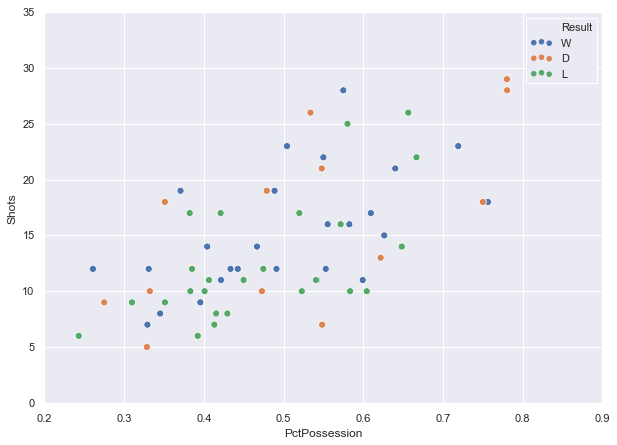

In [345]:
df1 = df.iloc[0:64]
print "W:"+str(len(df1[df1['Result']=='W']))
print "D:"+str(len(df1[df1['Result']=='D']))
print "L:"+str(len(df1[df1['Result']=='L']))
ax = sns.scatterplot(x='PctPossession',y='Shots',data=df1, hue='Result', s=50);
del(df1)

In [607]:
df1 = df.iloc[0:64]

def encode_result(x):
    if x == 'W':
        val = 1
    else:
        val = 0
    return val

# Add target column where 0 = Draw/Loss and 1 = Win 
df1['y'] = df1['Result'].apply(encode_result)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [613]:
df1[['match_date','team.name','score','Shots','PctPossession','Opp_team.name','Opp_score','Opp_Shots','Opp_PctPossession','y']].tail(2)

,match_date,team.name,score,Shots,PctPossession,Opp_team.name,Opp_score,Opp_Shots,Opp_PctPossession,y
62,2018-07-14,Belgium,2,11,0.421453,England,0,15,0.578547,1
63,2018-07-15,France,4,8,0.345154,Croatia,2,15,0.654846,1
